## Calculating area under a curve

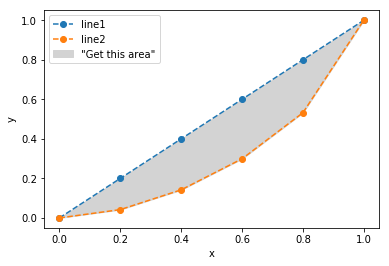

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
y1 = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
y2 = [0, 0.042, 0.142, 0.299, 0.532, 1.00]

plt.plot(x, y1, '--o', label = 'line1')
plt.plot(x, y2, '--o', label = 'line2')
plt.fill_between(x, y1, y2, color = 'lightgray',label='"Get this area"')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best', frameon = True)

##### Q: What is the area of the region shaded in grey?

##### A: substract area under line2 from area under line1

$ "Get\ this\ area" = area\ under\ line1 - area\ under\ line2 $

##### getting area under line1 would be easy, since it is a diagonal, $y=f(x)=x$ 
$area\ under\ line1\ = total\ area\ /\ 2$
##### Since x and y are equal (both range from 0 to 1), $total\ area\ = 1$
##### So. $area\ under\ line1\ = 0.5$
#####  but, line2 is a curved line, calculating $area\ under\ line1$ is not going to be that easy. 
#####  First we need to find a pattern or trend of line2 with values of $x$
#####  the $y2$ data underlying line2 need to be formulated in a mathematical expression.. 
##### so that it can be integrated later [SPOILER ALERT].

##### Looking at the trend of line2 we wud first search through degrees of $x$ i.e. $x^2$, $x^3$, $x^4$ so on..

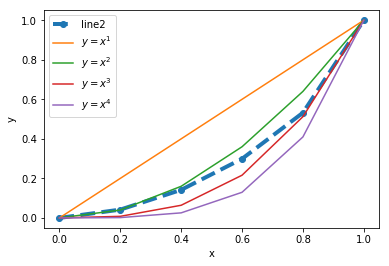

In [8]:
x = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
y1 = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
y2 = [0, 0.042, 0.142, 0.299, 0.532, 1.00]

plt.plot(x, y2, '--o', label = 'line2',lw=4)
for power in [1,2,3,4]:
    plt.plot(x,[i**power for i in x],label='$y=x^{}$'.format(power))
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best', frameon = True)

##### now we get the formal equation of line2 by fitting it to a polynomial equation with degree=2

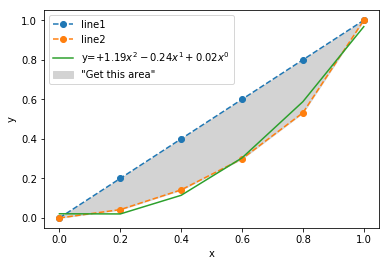

In [9]:
x = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
y1 = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
y2 = [0, 0.042, 0.142, 0.299, 0.532, 1.00]

fit = np.poly1d(np.polyfit(x, y2, 2))
plt.plot(x, y1, '--o', label = 'line1')
plt.plot(x, y2, '--o', label = 'line2')
plt.plot(x,fit(x),
         label='y=${}$'.format(''.join(['{}x^{}'.format(('{:.2f}'.format(j) if j<0 else '+{:.2f}'.format(j)),(len(fit.coef)-i-1)) for i,j in enumerate(fit.coef)])))
# plt.plot(x, fit(x),label = '$y=1.18x^2-0.24x+0.02$')
plt.fill_between(x, y1, y2, color = 'lightgray',label='"Get this area"')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best', frameon = True)

##### Now that the formal equation for line 2 is also ready ($y=f(x)=y=1.18x^2-0.24x+0.02$),
##### areas under both lines can calculated (integrated).  

In [10]:
%%sh
jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

from ipywidgets import interact, interactive, fixed, interact_manual,FloatSlider
from IPython.display import display
import ipywidgets as widgets

a_widget = FloatSlider(min=0.0, max=1.0, step=0.2,value=0)
b_widget = FloatSlider(min=0.0, max=1.0, step=0.2,value=0)
dx_widget = FloatSlider(min=0.01, max=0.05, step=0.01,value=0.05)
# n_widget = FloatSlider(min=20, max=100, step=20,value=20)

#@interact(a=a_widget, b=b_widget, n=n_widget)
def plot_integration_interact(a=0, b=1, dx=100):  
#     fig, ax = plt.subplots()
    ax=plt.subplot(111)
    ax.plot(x, y1, '--o', label = 'line1')
    ax.plot(x, y2, '--o', label = 'line2')
    ax.plot(x,fit(x),
             label='y=${}$'.format(''.join(['{}x^{}'.format(('{:.2f}'.format(j) if j<0 else '+{:.2f}'.format(j)),(len(fit.coef)-i-1)) for i,j in enumerate(fit.coef)])))
    # plt.plot(x, fit(x),label = '$y=1.18x^2-0.24x+0.02$')
    ax.fill_between(x, y1, y2, color = 'lightgray',label='"Get this area"')
    ax=integration(f,a, b, dx,ax=ax,facecolor = 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc = 'best', frameon = True)
    ax.set_title('$area under line1$')
    plt.show()

In [12]:
# Integration calculation.
def integration(f,a, b, dx, verbose=True,
                plot=True,ax=None,facecolor = 'r'):
    n=(b - a) / dx
    if n>10:
        verbose=False
    if verbose:
        print('a= {}, b= {}, dx= {:.3f}'.format(a,b,dx))
    integration = 0
    for i in np.arange(1, n + 1):
        integration += f(a + i * dx) * dx
        if verbose:
            print('f(x)={:.3f} when x was {:.3f}'.format(f(a + i * dx) * dx,a + i * dx))
        if plot:
    #         ax.plot(a + i * dx,f(a + i * dx),'o')
            if i==n+1:
                label=r"$\int_{a}^{b}f(x)dx$"+"={:.6f}".format(integration)
            else:
                label=None
            ax.add_patch(Polygon([(a + i * dx-dx,f(a + i * dx)),(a + i * dx,f(a + i * dx)),
                                  (a + i * dx,0),(a + i * dx-dx,0)], facecolor = facecolor, alpha=0.3, label = label))
                
    print('sum of all f(x) = {:.3f} = area under the line'.format(integration))
    return ax

$area\ under\ line1$

In [13]:
def f(x):
    return 1.19*x**2 - 0.24*x + 0.02 
interactive(plot_integration_interact, a=a_widget, b=b_widget, dx=dx_widget)

$area\ under\ line2$

a= 0.0, b= 0.0, dx= 0.050
sum of all f(x) = 0.000 = area under the line


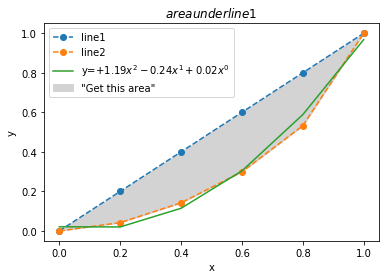

In [8]:
def f(x):
    return x 
interactive(plot_integration_interact, a=a_widget, b=b_widget, dx=dx_widget)

##### Now evaluating integrations using  `Computer Algebra System (CAS)` .

In [1]:
from sympy import *
init_printing(use_latex='mathjax')
x = Symbol('x')

##### first, $area\ under\ line1$

In [2]:
eq1=Integral(x, (x, 0, 1))
eq1

1     
⌠     
⎮ x dx
⌡     
0     

In [3]:
eq2=eq1.integrate(x)
eq2

x
─
2

In [4]:
print(eq2.evalf(subs={x:1}))
area_under_line1=eq2.evalf(subs={x:1})

0.500000000000000


In [6]:
eq3=Integral((x - fit(x)), (x, 0, 1))
eq3

NameError: name 'fit' is not defined

In [14]:
eq4=eq3.integrate(x)
eq4

0.203779761904762⋅x

In [15]:
print(eq4.evalf(subs={x:1}))
area_under_line2=eq4.evalf(subs={x:1})

0.203779761904762


In [16]:
Get_this_area=area_under_line1-area_under_line2
print(Get_this_area)

0.296220238095238
